In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Checking Missing Values & Data Types

In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Mental Health Dataset.csv.zip'
df = pd.read_csv(file_path)

In [3]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


In [5]:
print("\nTipe Data:")
print(df.info())


Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_W

In [6]:
print(f"\nUkuran Data: {df.shape}")


Ukuran Data: (292364, 17)


## Target Analysis

/tmp/ipython-input-2495137469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='treatment', data=df, palette='viridis')


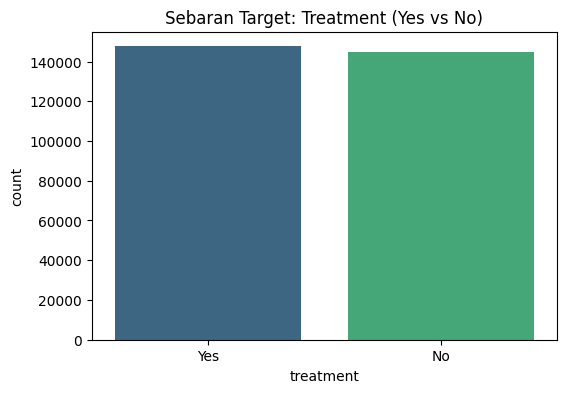

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='treatment', data=df, palette='viridis')
plt.title('Sebaran Target: Treatment (Yes vs No)')
plt.show()

In [8]:
print(df['treatment'].value_counts(normalize=True))

treatment
Yes    0.504871
No     0.495129
Name: proportion, dtype: float64


## Bivariate Analysis

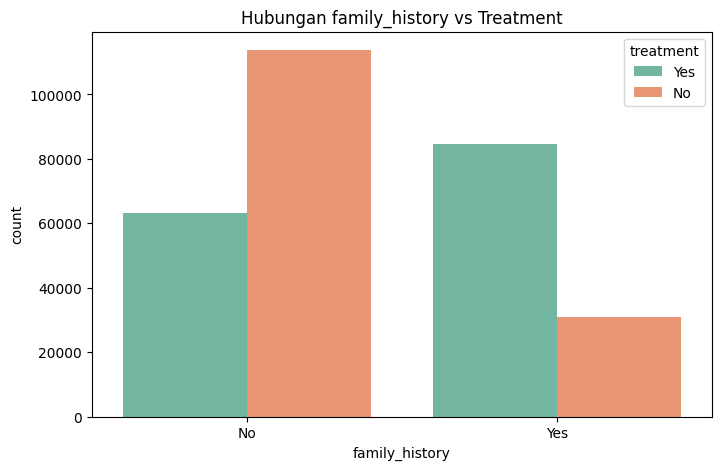

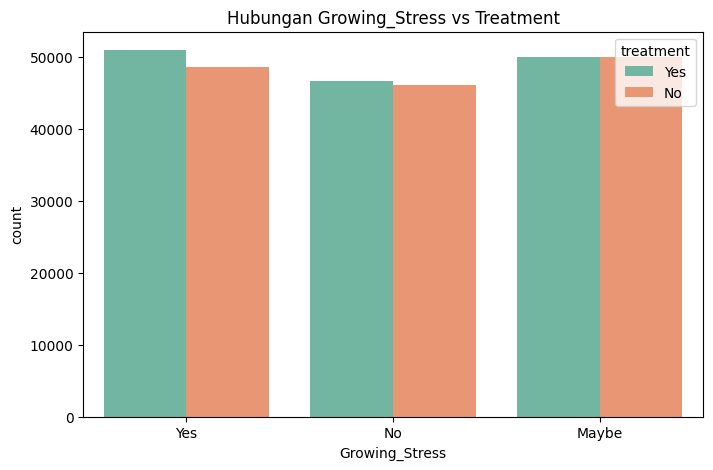

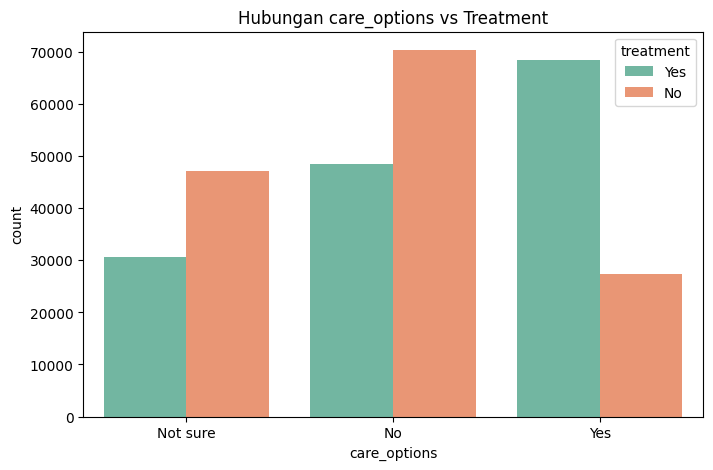

In [9]:
def plot_bivariate(column_name):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column_name, hue='treatment', data=df, palette='Set2')
    plt.title(f'Hubungan {column_name} vs Treatment')
    plt.show()

plot_bivariate('family_history')
plot_bivariate('Growing_Stress')
plot_bivariate('care_options')

In [10]:
print("Nilai unik di kolom Gender:")
print(df['Gender'].unique())

Nilai unik di kolom Gender:
['Female' 'Male']


## Heatmap of Correlations

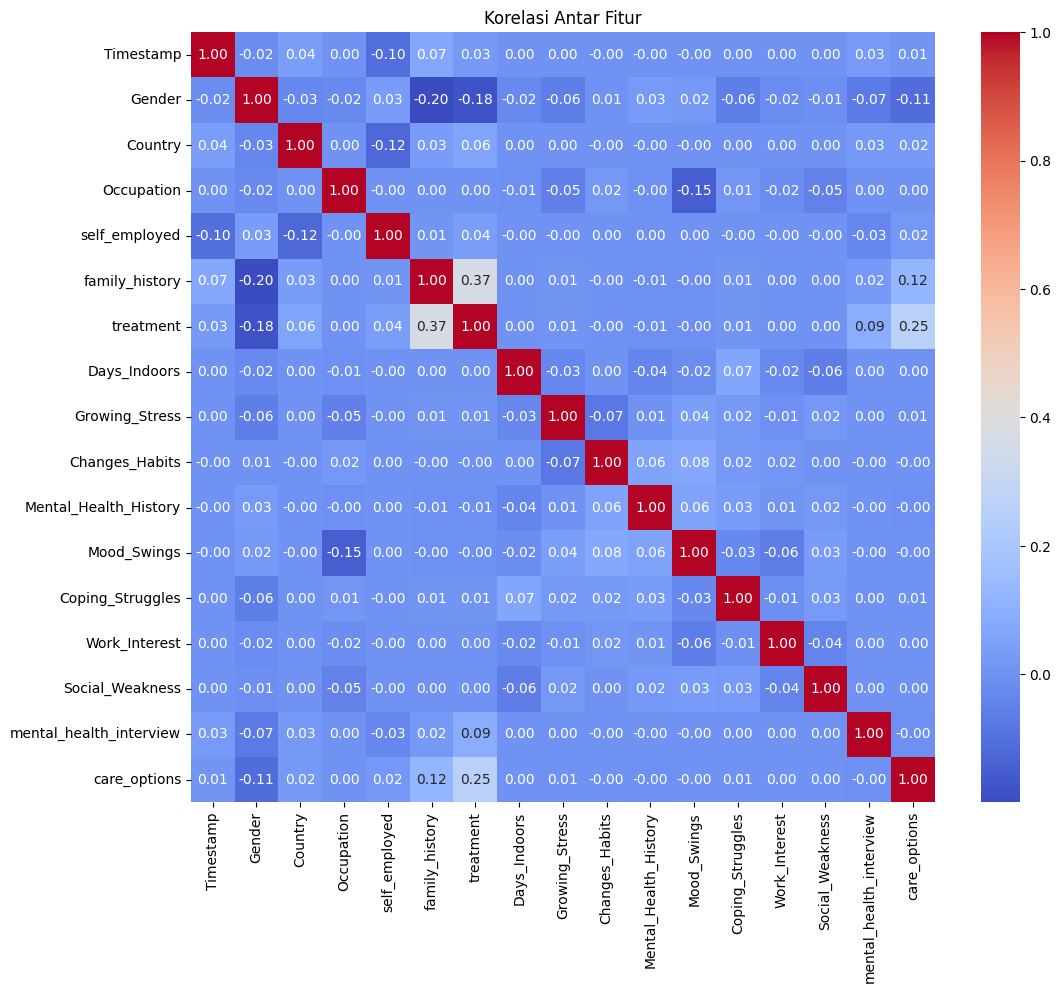

In [11]:
df_temp = df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_temp.columns:
    if df_temp[col].dtype == 'object':
        df_temp[col] = le.fit_transform(df_temp[col].astype(str))

# Plot Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_temp.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

## Data Cleaning

In [12]:
import numpy as np

if 'Timestamp' in df.columns:
    df = df.drop('Timestamp', axis=1)

In [14]:
counts = df['self_employed'].value_counts(dropna=False)
print(counts)

self_employed
No     257994
Yes     29168
NaN      5202
Name: count, dtype: int64


In [15]:
modus_self_employed = df['self_employed'].mode()[0]
df['self_employed'] = df['self_employed'].fillna(modus_self_employed)
print(f"Nilai kosong di 'self_employed' telah diisi dengan: {modus_self_employed}")

Nilai kosong di 'self_employed' telah diisi dengan: No


In [16]:
print(df.isnull().sum())

Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


## Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

# Daftar kolom yang perlu diubah jadi angka (semua yang tipe datanya object)
categorical_cols = df.select_dtypes(include=['object']).columns

In [18]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    # Simpan encoder ke dalam dictionary
    encoders[col] = le

    # Tampilkan Mapping
    print(f"Mapping untuk kolom '{col}':")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(mapping)
    print("-" * 30)

# Cek hasil data akhir
print(df.head())

Mapping untuk kolom 'Gender':
{'Female': np.int64(0), 'Male': np.int64(1)}
------------------------------
Mapping untuk kolom 'Country':
{'Australia': np.int64(0), 'Belgium': np.int64(1), 'Bosnia and Herzegovina': np.int64(2), 'Brazil': np.int64(3), 'Canada': np.int64(4), 'Colombia': np.int64(5), 'Costa Rica': np.int64(6), 'Croatia': np.int64(7), 'Czech Republic': np.int64(8), 'Denmark': np.int64(9), 'Finland': np.int64(10), 'France': np.int64(11), 'Georgia': np.int64(12), 'Germany': np.int64(13), 'Greece': np.int64(14), 'India': np.int64(15), 'Ireland': np.int64(16), 'Israel': np.int64(17), 'Italy': np.int64(18), 'Mexico': np.int64(19), 'Moldova': np.int64(20), 'Netherlands': np.int64(21), 'New Zealand': np.int64(22), 'Nigeria': np.int64(23), 'Philippines': np.int64(24), 'Poland': np.int64(25), 'Portugal': np.int64(26), 'Russia': np.int64(27), 'Singapore': np.int64(28), 'South Africa': np.int64(29), 'Sweden': np.int64(30), 'Switzerland': np.int64(31), 'Thailand': np.int64(32), 'United

## Split Data

In [19]:
from sklearn.model_selection import train_test_split

# X = Semua kolom KECUALI 'treatment'
X = df.drop('treatment', axis=1)

# y = Hanya kolom 'treatment' (Target)
y = df['treatment']

# Bagi data: 80% Latih (Train), 20% Uji (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah Data Latih: {X_train.shape[0]}")
print(f"Jumlah Data Uji: {X_test.shape[0]}")

Jumlah Data Latih: 233891
Jumlah Data Uji: 58473


## Train

In [20]:
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Evaluasi

In [21]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi data uji
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\nLaporan Detail:")
print(classification_report(y_test, y_pred))

Akurasi Model: 77.48%

Laporan Detail:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76     28895
           1       0.75      0.83      0.79     29578

    accuracy                           0.77     58473
   macro avg       0.78      0.77      0.77     58473
weighted avg       0.78      0.77      0.77     58473



## Save Model .pkl

In [22]:
import pickle
filename = 'model_mental_health.pkl'
pickle.dump(model, open(filename, 'wb'))

## Save Dataset Clean


In [23]:
nama_file_baru = 'Mental_Health_Cleaned.csv'